In [1]:
import pandas as pd
import numpy as np

treino = pd.read_csv('merged_treinofinal.csv')
# treino = pd.read_csv('TH.csv')

In [2]:
treino['Data'] = pd.to_datetime(treino['Data']).dt.date

In [26]:
import datetime
#Horário de verão ou inverno
treino['Horario'] = 1

treino.loc[treino['Data'] < datetime.date(2023,3,26), 'Horario'] = 0
treino.loc[treino['Data'] < datetime.date(2022,10,30), 'Horario'] = 1
treino.loc[treino['Data'] < datetime.date(2022,3,27), 'Horario'] = 0
treino.loc[treino['Data'] < datetime.date(2021,10,31), 'Horario'] = 1
treino.loc[treino['Data'] < datetime.date(2021,3,28), 'Horario'] = 0
treino.loc[treino['Data'] < datetime.date(2020,10,25), 'Horario'] = 1
treino.loc[treino['Data'] < datetime.date(2020,3,29), 'Horario'] = 0
treino.loc[treino['Data'] < datetime.date(2019,10,27), 'Horario'] = 1
treino.loc[treino['Data'] < datetime.date(2019,3,31), 'Horario'] = 0
treino.loc[treino['Data'] < datetime.date(2018,10,28), 'Horario'] = 1

treino['hora_noite'] = pd.to_datetime(treino['hora_noite'])
treino.loc[treino['Horario'] == 1, 'hora_noite'] = treino.loc[treino['Horario'] == 1, 'hora_noite'] + pd.Timedelta(hours=1)
treino['hora_noite'] = treino['hora_noite'].dt.time

treino['Horário'] = pd.to_datetime(treino['Horário']).dt.time
treino['Noite'] = treino['Horário'] > treino['hora_noite']

In [27]:
treino['Noite'].value_counts()

False    923
True     301
Name: Noite, dtype: int64

In [4]:
treino['dif'] = treino['goals_home'] - treino['goals_away']
treino['xg_dif'] = treino['xG_home'] - treino['xG_away']

treino.loc[treino['dif']>0, 'result'] = 'H'
treino.loc[treino['dif']==0, 'result'] = 'D'
treino.loc[treino['dif']<0, 'result'] = 'A'

In [5]:
#Define o favorito
treino.loc[treino['B365H'] < 2.26, 'fav'] = 'H'
treino.loc[treino['B365H'] < 1.40, 'fav'] = 'HH'
treino.loc[treino['B365A'] < 2.26, 'fav'] = 'A'
treino.loc[treino['B365A'] < 1.40, 'fav'] = 'AA'
treino.loc[treino['fav'].isna(), 'fav'] = 'D'

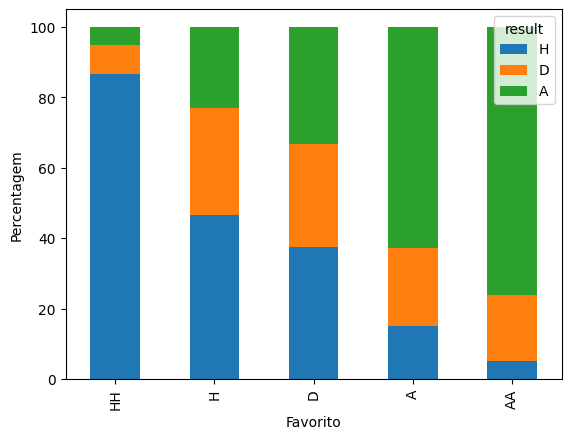

In [6]:
import matplotlib.pyplot as plt
order = ['H', 'D', 'A']
category_order = ['HH', 'H', 'D', 'A', 'AA']

# Convert 'x' column to categorical data type with the specified order
treino['fav'] = pd.Categorical(treino['fav'], categories=category_order, ordered=True)
treino['result'] = pd.Categorical(treino['result'], categories=order, ordered=True)

# Calculate the percentage of values in column 'y' for each unique value in column 'x'
result = treino.groupby('fav')['result'].value_counts(normalize=True) * 100

# Criar o gráfico de barras
result.unstack().plot(kind='bar',stacked=True)

# Configurar os rótulos dos eixos
plt.xlabel('Favorito')
plt.ylabel('Percentagem')

# Exibir o gráfico
plt.show()

<AxesSubplot: ylabel='fav'>

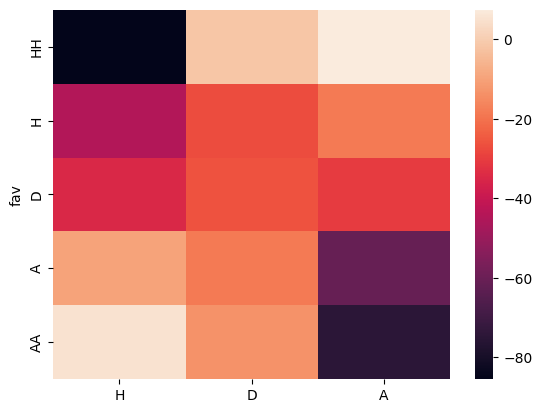

In [7]:
import seaborn as sns
#Fazer reverse ao cmap

order = ['H', 'D', 'A']

sns.heatmap(treino[['fav','B365H','B365D','B365A']].groupby('fav').mean().rename({'B365H': 'H','B365D': 'D', 'B365A': 'A'}, axis=1) - result.unstack()[order].reindex(['HH', 'H', 'D', 'A', 'AA']))

In [8]:
treino[['Horário','result']].groupby('Horário').count()

,result
Horário,
12:45,1
13:00,1
14:00,3
14:30,13
15:00,110
15:30,141
16:00,28
16:30,15
17:00,41


In [25]:
import requests

datas = treino['Data'].unique()

for data in datas:
    url = f'https://api.sunrise-sunset.org/json?lat=41.4500&lng=-8.3000&date={data}'
    response = requests.get(url)
    resposta = response.json()
    treino.loc[treino['Data'] == data, 'hora_noite'] = resposta['results']['astronomical_twilight_end']
    print(data)


2018-08-10
2018-08-11
2018-08-12
2018-08-13
2018-08-17
2018-08-18
2018-08-19
2018-08-20
2018-08-24
2018-08-25
2018-08-26
2018-08-27
2018-08-31
2018-09-01
2018-09-02
2018-09-21
2018-09-22
2018-09-23
2018-09-24
2018-09-27
2018-09-28
2018-09-29
2018-09-30
2018-10-01
2018-10-05
2018-10-06
2018-10-07
2018-10-26
2018-10-27
2018-10-28
2018-11-02
2018-11-03
2018-11-04
2018-11-05
2018-11-09
2018-11-10
2018-11-11
2018-11-30
2018-12-01
2018-12-02
2018-12-03
2018-12-07
2018-12-08
2018-12-09
2018-12-10
2018-12-14
2018-12-15
2018-12-16
2018-12-22
2018-12-23
2019-01-02
2019-01-03
2019-01-05
2019-01-06
2019-01-07
2019-01-10
2019-01-11
2019-01-12
2019-01-13
2019-01-18
2019-01-19
2019-01-20
2019-01-28
2019-01-29
2019-01-30
2019-02-01
2019-02-02
2019-02-03
2019-02-04
2019-02-08
2019-02-09
2019-02-10
2019-02-11
2019-02-15
2019-02-16
2019-02-17
2019-02-18
2019-02-22
2019-02-23
2019-02-24
2019-02-25
2019-03-01
2019-03-02
2019-03-03
2019-03-04
2019-03-08
2019-03-09
2019-03-10
2019-03-11
2019-03-15
2019-03-16

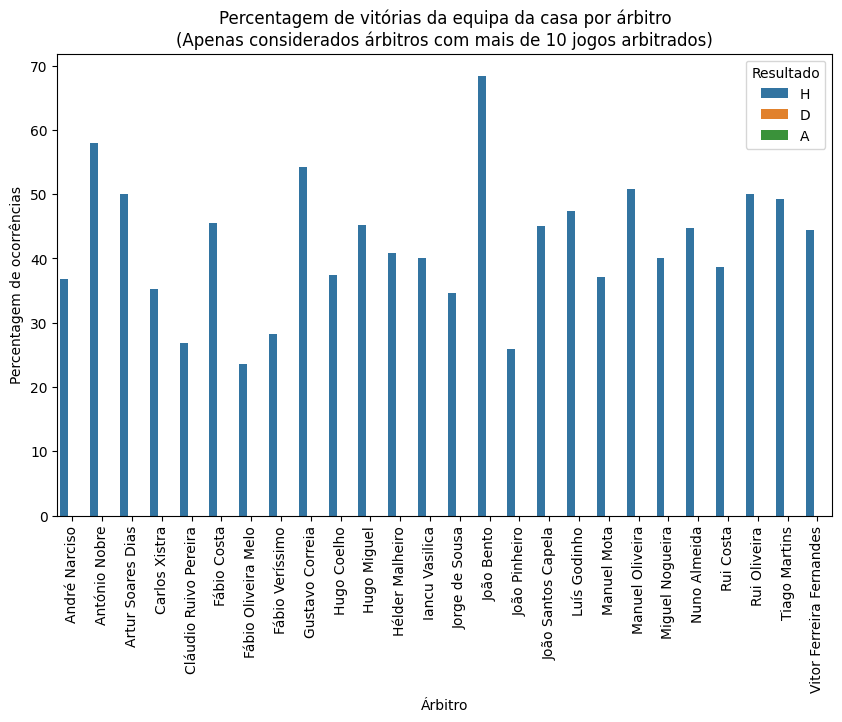

In [10]:
import matplotlib.pyplot as plt

# Calcular a contagem de ocorrências de cada valor por árbitro
# Contar o número de jogos arbitrados por árbitro
counts_arbitro = treino['Árbitro'].value_counts()

# Filtrar os árbitros com menos de 10 jogos arbitrados
arbitros_filtrados = counts_arbitro[counts_arbitro >= 10].index

# Filtrar o DataFrame original com base nos árbitros filtrados
df_filtrado = treino[treino['Árbitro'].isin(arbitros_filtrados)]

# Calcular a contagem de ocorrências de cada valor por árbitro no DataFrame filtrado
counts = df_filtrado.groupby('Árbitro')['result'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

counts = counts[counts['result'] == 'H']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Árbitro', y='Percentage', hue='result', data=counts)
plt.title('Percentagem de vitórias da equipa da casa por árbitro\n(Apenas considerados árbitros com mais de 10 jogos arbitrados)')
plt.xlabel('Árbitro')
plt.ylabel('Percentagem de ocorrências')
plt.xticks(rotation=90)
plt.legend(title='Resultado')

plt.show()

In [19]:
# Testar se há evidência estatística de que a presença do árbitro João Bento influencia a favor da equipa da casa

bento = treino[treino['Árbitro'] == 'João Bento']
nao_bento = treino[treino['Árbitro'] != 'João Bento']

# -> H0: média da dif de golos com joão bento - média da dif de golos sem joão bento = 0 (A equipa da casa não tem vantagem)
# -> H1: média da dif de golos com joão bento - média da dif de golos sem joão bento > 0 (A equipa da casa tem vantagem)

test_statistic, p_value = ttest_ind(bento['dif'], nao_bento['dif'], alternative='greater')

# Print the test statistic and p-value
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

# t-test statistic: 1.93
# p-value: 0.0269

# Como p-value < 0.05, rejeitamos H0, o que nos diz que a equipa da casa é beneficiada com a presença do árbitro João Bento

# Nota: Este árbitro foi despromovido na época 2020/21

t-test statistic: 1.93
p-value: 0.0269


In [ ]:
# Testar se há evidência estatística de que a presença do árbitro António Nobre influencia a favor da equipa da casa

bento = treino[treino['Árbitro'] == 'António Nobre']
nao_bento = treino[treino['Árbitro'] != 'António Nobre']

# -> H0: média da dif de golos com joão bento - média da dif de golos sem joão bento = 0 (A equipa da casa não tem vantagem)
# -> H1: média da dif de golos com joão bento - média da dif de golos sem joão bento > 0 (A equipa da casa tem vantagem)

test_statistic, p_value = ttest_ind(bento['dif'], nao_bento['dif'], alternative='greater')

# Print the test statistic and p-value
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

# t-test statistic: 1.93
# p-value: 0.0269

# Como p-value < 0.05, rejeitamos H0, o que nos diz que a equipa da casa é beneficiada com a presença do árbitro João Bento

# Nota: Este árbitro foi despromovido na época 2020/21

In [12]:
treino[treino['Árbitro'] == 'António Nobre']['dif'].mean()

0.86

In [13]:
treino[treino['Árbitro'] != 'António Nobre']['dif'].mean()

0.19591141396933562

<AxesSubplot: xlabel='Assistance'>

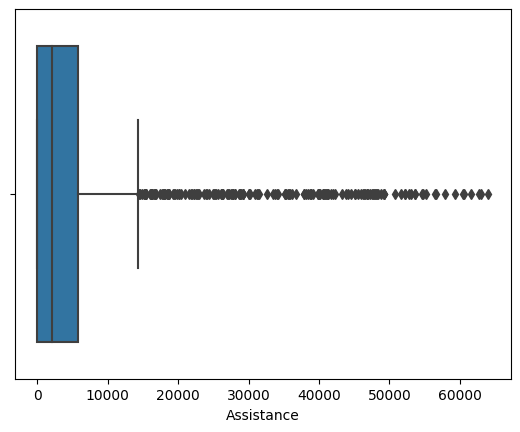

In [16]:
import seaborn as sns

sns.boxplot(x=treino['Assistance'])

In [17]:
treino['Assistance'].describe()

count     1224.000000
mean      6826.734477
std      12284.294068
min          0.000000
25%          0.000000
50%       2101.500000
75%       5704.250000
max      64064.000000
Name: Assistance, dtype: float64

In [14]:
treino['dif'] = treino['goals_home'] - treino['goals_away']
treino['xg_dif'] = treino['xG_home'] - treino['xG_away']

treino_t1 = treino[['Data','Assistance','dif','xg_dif']].copy()

covid = treino_t1[treino_t1['Assistance'] == 0]
nao_covid = treino_t1[treino_t1['Assistance'] != 0]

In [15]:
# -> H0: média da dif de golos com espectadores - média da dif de golos sem espectadores = 0
# -> H1: média da dif de golos com espectadores - média da dif de golos sem espectadores > 0
from scipy.stats import ttest_ind

test_statistic, p_value = ttest_ind(covid['dif'], nao_covid['dif'], alternative='greater')

# Print the test statistic and p-value
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

# t-test statistic: -0.72
# p-value: 0.7645

# Não rejeitamos a hipotese nula, a presença de espectadores não afeta a diferença de golos

t-test statistic: -0.72
p-value: 0.7645


In [20]:
# -> H0: média da dif de golos com espectadores - média da dif de golos sem espectadores = 0
# -> H1: média da dif de golos com espectadores - média da dif de golos sem espectadores > 0
from scipy.stats import ttest_ind


test_statistic, p_value = ttest_ind(covid['xg_dif'], nao_covid['xg_dif'], alternative='greater')

# Print the test statistic and p-value
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

# t-test statistic: -0.67
# p-value: 0.7472

# Não rejeitamos a hipotese nula

t-test statistic: -0.67
p-value: 0.7472


In [21]:
treino.loc[treino['Dia'] == 'sáb', 'FDSem'] = 1
treino.loc[treino['Dia'] == 'dom', 'FDSem'] = 1
treino.loc[treino['FDSem'].isna(), 'FDSem'] = 0

In [28]:
treino['Noite'].value_counts()

False    923
True     301
Name: Noite, dtype: int64

In [29]:
fim = treino[treino['FDSem'] == 1]
nao_fim = treino[treino['FDSem'] != 1]

noite = treino[treino['Noite'] == True]
nao_noite = treino[treino['Noite'] == False]

In [24]:
# -> H0: média da dif de golos com jogo ao fim de semana
# -> H1: média da dif de golos com jogo durante a semana
from scipy.stats import ttest_ind


test_statistic, p_value = ttest_ind(fim['xg_dif'], nao_fim['xg_dif'], alternative='greater')

# Print the test statistic and p-value
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

# t-test statistic: 1.46
# p-value: 0.0722

t-test statistic: 1.46
p-value: 0.0722


In [30]:
# -> H0: média da dif de golos com jogo à noite
# -> H1: média da dif de golos com jogo durante o dia
from scipy.stats import ttest_ind


test_statistic, p_value = ttest_ind(noite['xg_dif'], nao_noite['xg_dif'], alternative='greater')

# Print the test statistic and p-value
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

# t-test statistic: -0.03
# p-value: 0.5101

t-test statistic: -0.03
p-value: 0.5101


In [31]:
treino['formacao_home'].value_counts()

4-2-3-1      318
4-3-3        282
4-4-2        248
3-4-3        177
4-1-4-1       79
5-4-1         29
4-4-1-1       18
3-4-1-2       16
3-5-2         15
5-3-2         13
4-5-1          7
4-1-2-1-2      6
4-1-3-2        5
4-2-2-2        3
4-3-1-2        3
3-2-4-1        1
4-3-2-1        1
3-5-1-1        1
3-1-4-2        1
Name: formacao_home, dtype: int64

In [32]:
treino['formacao_home'].isna().sum()

1

In [33]:
seis = treino[treino['AST'] >= 6]
nao_seis = treino[treino['AST'] < 6]



In [34]:
# -> H0: média da dif de golos com jogo à noite
# -> H1: média da dif de golos com jogo durante o dia
from scipy.stats import ttest_ind


test_statistic, p_value = ttest_ind(seis['xg_dif'], nao_seis['xg_dif'], alternative='greater')

# Print the test statistic and p-value
print("t-test statistic: {:.2f}".format(test_statistic))
print("p-value: {:.4f}".format(p_value))

# t-test statistic: -0.03
# p-value: 0.5101

# tenho de corrigir

t-test statistic: -17.52
p-value: 1.0000


In [54]:
treino.loc[treino['result'] == 'H', 'home_Points'] = 3
treino.loc[treino['result'] == 'D', 'home_Points'] = 1
treino.loc[treino['result'] == 'A', 'home_Points'] = 0
treino.loc[treino['result'] == 'A', 'away_Points'] = 3
treino.loc[treino['result'] == 'D', 'away_Points'] = 1
treino.loc[treino['result'] == 'H', 'away_Points'] = 0

for team in treino['home'].unique():
       dfHomeGames = treino[treino['home'] == team]
       dfAwayGames = treino[treino['away'] == team]
       dfTotal = pd.concat([dfHomeGames,dfAwayGames])

       dfTotal.sort_index(inplace=True)
       rows_to_update_home = dfHomeGames.index
       rows_to_update_away = dfAwayGames.index
       
       dfTotal['points'] = dfTotal.apply(lambda row: row['home_Points'] if row['home'] == team else row['away_Points'],axis=1)
       coluna = 'points'
       dfTotal[f'{coluna}_MA5'] = dfTotal[coluna].rolling(5, closed='left').mean()
       dfTotal[f'{coluna}_MA17'] = dfTotal[coluna].rolling(17, closed='left').mean()
       dfTotal[f'{coluna}_MA34'] = dfTotal[coluna].rolling(34, closed='left').mean()
       treino.loc[rows_to_update_home, f'{coluna}_home_MA5'] = dfTotal.loc[rows_to_update_home, f'{coluna}_MA5']
       treino.loc[rows_to_update_away, f'{coluna}_away_MA5'] = dfTotal.loc[rows_to_update_away, f'{coluna}_MA5']
       treino.loc[rows_to_update_home, f'{coluna}_home_MA17'] = dfTotal.loc[rows_to_update_home, f'{coluna}_MA17']
       treino.loc[rows_to_update_away, f'{coluna}_away_MA17'] = dfTotal.loc[rows_to_update_away, f'{coluna}_MA17']
       treino.loc[rows_to_update_home, f'{coluna}_home_MA34'] = dfTotal.loc[rows_to_update_home, f'{coluna}_MA34']
       treino.loc[rows_to_update_away, f'{coluna}_away_MA34'] = dfTotal.loc[rows_to_update_away, f'{coluna}_MA34']


In [55]:
treino

,Jornada,Dia,Data,Horário,home,xG_home,xG_away,away,Assistance,Local,...,away_Points,home_total,posicao_casa,posicao_fora,points_home_MA5,points_away_MA5,points_home_MA17,points_away_MA17,points_home_MA34,points_away_MA34
0,1.0,sex,2018-08-10,20:30:00,Benfica,1.9,1.0,Guimaraes,55219.0,Estádio do Sport Lisboa e Benfica,...,0.0,0.0,1.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,sáb,2018-08-11,16:30:00,Setubal,1.8,0.3,Aves,5182.0,Estádio do Bonfim,...,0.0,0.0,2.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,sáb,2018-08-11,19:00:00,Tondela,1.3,0.5,Belenenses,2010.0,Estádio João Cardoso,...,3.0,3.0,3.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,sáb,2018-08-11,21:00:00,Porto,4.5,0.1,Chaves,46509.0,Estádio Do Dragão,...,0.0,0.0,4.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,dom,2018-08-12,16:00:00,Maritimo,2.2,0.8,Santa Clara,5893.0,Estádio dos Barreiros,...,0.0,0.0,5.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,34.0,sáb,2022-05-14,18:00:00,Porto,1.6,0.7,Estoril,47512.0,Estádio Do Dragão,...,0.0,0.0,18.0,11.0,2.4,1.0,2.588235,0.823529,2.676471,NaN
1220,34.0,sáb,2022-05-14,18:00:00,Maritimo,1.5,1.3,Portimonense,4124.0,Estádio dos Barreiros,...,3.0,3.0,10.0,6.0,1.0,1.2,1.235294,0.647059,1.117647,1.058824
1221,34.0,sáb,2022-05-14,20:30:00,Sp Lisbon,1.5,0.9,Santa Clara,28942.0,Estádio José Alvalade,...,0.0,0.0,17.0,12.0,2.4,1.8,2.235294,1.588235,2.500000,1.264706
1222,34.0,dom,2022-05-15,18:00:00,Famalicao,2.7,0.8,Sp Braga,4739.0,Estádio Municipal 22 de Junho,...,0.0,0.0,6.0,15.0,1.6,2.6,1.411765,2.000000,1.058824,1.941176


In [37]:
treino['season']

0       2018-19
1       2018-19
2       2018-19
3       2018-19
4       2018-19
         ...   
1219    2021-22
1220    2021-22
1221    2021-22
1222    2021-22
1223    2021-22
Name: season, Length: 1224, dtype: object

In [64]:
import time
epocas = treino['season'].unique()

for epoca in epocas:
  df_epoca = treino[treino['season'] == epoca]
  # [(equipa, pontos, GM, GS)]
  clas = []
  for equipa in df_epoca['home'].unique():
    clas.append((equipa,0,0,0))
  for index, row in df_epoca.iterrows():
    treino.loc[index, 'posicao_casa'] = clas.index(list(filter(lambda x: x[0] == row['home'], clas))[0])+1
    # Buscar posicao equipa fora
    treino.loc[index, 'posicao_fora'] = clas.index(list(filter(lambda x: x[0] == row['away'], clas))[0])+1
    # Somar pontos à equipa casa
    home_cenas = clas.pop(clas.index(list(filter(lambda x: x[0] == row['home'], clas))[0]))
    clas.append((home_cenas[0], home_cenas[1] + row['home_Points'], home_cenas[2] + row['goals_home'], home_cenas[3] + row['goals_away']))
    # Somar pontos à equipa fora
    away_cenas = clas.pop(clas.index(list(filter(lambda x: x[0] == row['away'], clas))[0]))
    clas.append((away_cenas[0], away_cenas[1] + row['away_Points'], away_cenas[2] + row['goals_away'], home_cenas[3] + row['goals_home']))
    # ordenar clas
    clas = sorted(clas, key=lambda x: (x[1], x[2]-x[3], x[2]), reverse=True)
    print(clas)

[('Benfica', 3.0, 3, 2), ('Setubal', 0, 0, 0), ('Tondela', 0, 0, 0), ('Porto', 0, 0, 0), ('Maritimo', 0, 0, 0), ('Feirense', 0, 0, 0), ('Moreirense', 0, 0, 0), ('Sp Braga', 0, 0, 0), ('Portimonense', 0, 0, 0), ('Aves', 0, 0, 0), ('Chaves', 0, 0, 0), ('Boavista', 0, 0, 0), ('Sp Lisbon', 0, 0, 0), ('Rio Ave', 0, 0, 0), ('Nacional', 0, 0, 0), ('Belenenses', 0, 0, 0), ('Santa Clara', 0, 0, 0), ('Guimaraes', 0.0, 2, 3)]
[('Setubal', 3.0, 2, 0), ('Benfica', 3.0, 3, 2), ('Tondela', 0, 0, 0), ('Porto', 0, 0, 0), ('Maritimo', 0, 0, 0), ('Feirense', 0, 0, 0), ('Moreirense', 0, 0, 0), ('Sp Braga', 0, 0, 0), ('Portimonense', 0, 0, 0), ('Chaves', 0, 0, 0), ('Boavista', 0, 0, 0), ('Sp Lisbon', 0, 0, 0), ('Rio Ave', 0, 0, 0), ('Nacional', 0, 0, 0), ('Belenenses', 0, 0, 0), ('Santa Clara', 0, 0, 0), ('Guimaraes', 0.0, 2, 3), ('Aves', 0.0, 0, 2)]
[('Setubal', 3.0, 2, 0), ('Benfica', 3.0, 3, 2), ('Belenenses', 3.0, 1, 0), ('Porto', 0, 0, 0), ('Maritimo', 0, 0, 0), ('Feirense', 0, 0, 0), ('Moreirense', 0

In [65]:
pd.set_option('display.max_rows', None)
treino

,Jornada,Dia,Data,Horário,home,xG_home,xG_away,away,Assistance,Local,...,away_Points,home_total,posicao_casa,posicao_fora,points_home_MA5,points_away_MA5,points_home_MA17,points_away_MA17,points_home_MA34,points_away_MA34
0,1.0,sex,2018-08-10,20:30:00,Benfica,1.9,1.0,Guimaraes,55219.0,Estádio do Sport Lisboa e Benfica,...,0.0,0.0,1.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,sáb,2018-08-11,16:30:00,Setubal,1.8,0.3,Aves,5182.0,Estádio do Bonfim,...,0.0,0.0,2.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,sáb,2018-08-11,19:00:00,Tondela,1.3,0.5,Belenenses,2010.0,Estádio João Cardoso,...,3.0,3.0,3.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,sáb,2018-08-11,21:00:00,Porto,4.5,0.1,Chaves,46509.0,Estádio Do Dragão,...,0.0,0.0,4.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,dom,2018-08-12,16:00:00,Maritimo,2.2,0.8,Santa Clara,5893.0,Estádio dos Barreiros,...,0.0,0.0,5.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,dom,2018-08-12,16:00:00,Feirense,1.2,0.4,Rio Ave,2646.0,Estádio Marcolino de Castro,...,0.0,0.0,6.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,dom,2018-08-12,18:30:00,Moreirense,0.7,2.6,Sp Lisbon,4886.0,P.D. Comendador Joaquim de Almeida Freit...,...,3.0,3.0,7.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,dom,2018-08-12,20:30:00,Sp Braga,2.3,1.3,Nacional,12387.0,Estádio Municipal de Braga,...,0.0,0.0,8.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,seg,2018-08-13,20:15:00,Portimonense,1.3,0.8,Boavista,3990.0,Estádio do Portimonense SC,...,3.0,3.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2.0,sex,2018-08-17,20:30:00,Aves,2.4,0.9,Tondela,1872.0,Estádio Clube Desportivo das Aves,...,1.0,1.0,15.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
